<a href="https://colab.research.google.com/github/earonhong126/Master-s-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use XGBRegression**

In [2]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 13.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=e320ae1634ece77624601dc810ce95b5dfcfba176f686d58ee9505695f617b9d
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [3]:
startDate = '2020/1/23'

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[02:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


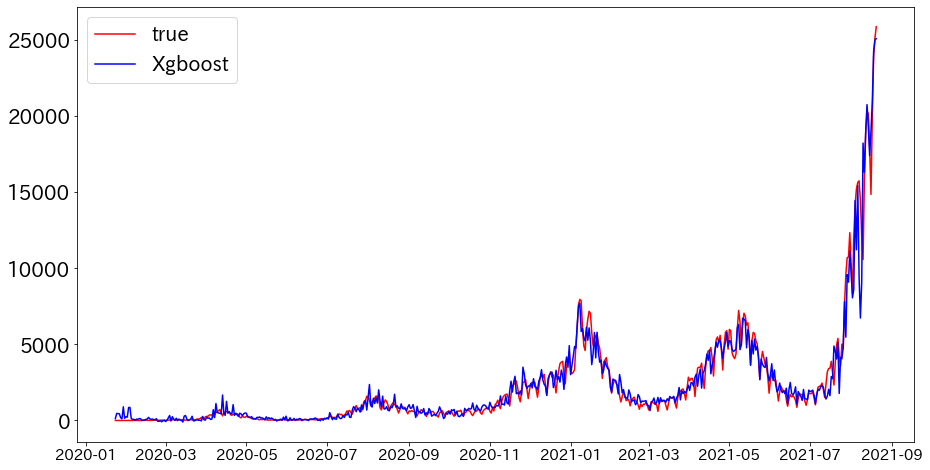

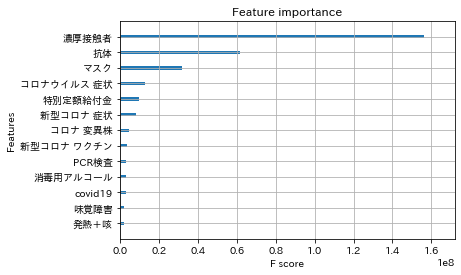

Train_RMSE: 439.422301  
Test_RMSE: 1552.084143  
RMSE: 799.590023  


In [4]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from xgboost import plot_importance
import xgboost as xgb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#load data ([k1_pop, k2_pop, ... , k12_pop, yesterday cases, daily confirmed cases])
dataset = loadtxt('ForTraining.csv', delimiter = ",", skiprows=1)
# dataset = loadtxt('lastday.csv', delimiter = ",", skiprows=1)

# split data into X and y
# X= dataset[:,12]
X = dataset[:,0:13]
y = dataset[:,13]
# max_y = np.max(y)
# y = y/max_y

FeatureNames = ["新型コロナ 症状","コロナウイルス 症状",
              "発熱＋咳","PCR検査","味覚障害",
              "消毒用アルコール","抗体",
              "マスク","新型コロナ ワクチン",
              "特別定額給付金","コロナ 変異株","濃厚接触者","covid19"]
# FeatureNames = ["last day"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train = pd.DataFrame(data=x_train, columns=FeatureNames)
x_test = pd.DataFrame(data=x_test, columns=FeatureNames)
X = pd.DataFrame(data=X, columns=FeatureNames)

train_set = xgb.DMatrix(x_train,y_train)
valid_set = xgb.DMatrix(x_test,y_test)
all_set = xgb.DMatrix(X, y)


model = xgb.XGBRegressor()
model.fit(x_train, y_train)
ds = pd.date_range(startDate,'2021/8/20')
pred = model.predict(X)
plt.figure(figsize=(15,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.plot(ds, y, color="red", label="true")
plt.plot(ds, pred,color="blue", label="Xgboost")
plt.legend(fontsize=20)
plt.show()

"""
# feature importance
print(model2.feature_importances_)
# plot
plt.bar(range(len(model2.feature_importances_)), model2.feature_importances_)
plt.show()
"""
# plot feature importance
# plt.figure(figsize=(12,8))
plot_importance(model,importance_type = "gain", show_values=False)
plt.show()

trainpred = model.predict(x_train)
train_mse = mean_squared_error(y_train, trainpred)
rmse = np.sqrt(train_mse)
print('Train_RMSE: %f  ' % rmse)

testpred = model.predict(x_test)
test_mse = mean_squared_error(y_test, testpred)
rmse = np.sqrt(test_mse)
print('Test_RMSE: %f  ' % rmse)

testpred = model.predict(X)
mse = mean_squared_error(y, testpred)
rmse = np.sqrt(mse)
print('RMSE: %f  ' % rmse)

# tree0 = xgb.to_graphviz(model)
# tree0.format = 'png'
# tree0.render('tree0')

# tree0 = xgb.to_graphviz(model, num_trees=3)
# tree0.format = 'png'
# tree0.render('tree1')

ランダムサーチ(XGBoostgression)

In [5]:
%%time
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import xgboost as xgb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

# 'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.0, 'colsample_bytree': 0.8}


cv_params ={
    'max_depth':[8],
    'min_child_weight':[1],
    'gamma':[0],
    'subsample':[0.7],
    'colsample_bytree':[0.8],
    'reg_alpha':[0.1],
    'n_estimators':[1000],
    'reg_lambda':[0.1],
    'learning_rate':[0.2]
}

# cv_params ={
#     'max_depth':[3,4,5,6,7,8,9,10],
#     'min_child_weight':[1,2,3,4,5],
#     'gamma':[i/10.0 for i in range(0,6)],
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)],
#     'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
#     'n_estimators':[1000,1200,1500,1700,2000],
#     'reg_lambda':[1e-5, 1e-2, 0.1, 1],
#     'learning_rate':[0.1, 0.2, 0.3]
# }
model = xgb.XGBRegressor(silent=False,n_jobs=-1)
model_rand = RandomizedSearchCV(model, cv_params, n_iter=50, cv=5,n_jobs=-1)
model_rand.fit(x_train, y_train, early_stopping_rounds=50, eval_set=[(x_test, y_test)], eval_metric='rmse', verbose=0)
print('optimal_parameter\n', model_rand.best_params_)

opt_model = model_rand.best_estimator_

trainpred = opt_model.predict(x_train)
train_mse = mean_squared_error(y_train, trainpred)
rmse = np.sqrt(train_mse)
print('Train_RMSE: %f  ' % rmse)

testpred = opt_model.predict(x_test)
test_mse = mean_squared_error(y_test, testpred)
rmse = np.sqrt(test_mse)
print('Test_RMSE: %f  ' % rmse)

allpred = opt_model.predict(X)
all_mse = mean_squared_error(y, allpred)
rmse = np.sqrt(all_mse)
print('all_RMSE: %f  ' % rmse)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[02:59:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
optimal_parameter
 {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
Train_RMSE: 331.493275  
Test_RMSE: 1395.063565  
all_RMSE: 692.604606  
CPU times: user 263 ms, sys: 32.1 ms, total: 295 ms
Wall time: 4.07 s


グリッドサーチ(XGBoostgression)
<br> time costly

In [ ]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import xgboost as xgb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

cv_params ={
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_child_weight':[1,2,3,4,5],
    'gamma':[i/10.0 for i in range(0,6)],
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[2000],
    'reg_lambda':[1e-5, 1e-2, 0.1],
    'learning_rate':[0.2,]
}
model = xgb.XGBRegressor(silent=False,n_jobs=-1)
model_grid = GridSearchCV(model, cv_params, cv=5,n_jobs=-1)
model_grid.fit(x_train, y_train, early_stopping_rounds=50, eval_set=[(x_test, y_test)], eval_metric='rmse', verbose=0)
print('optimal_parameter\n', model_grid.best_params_)

opt_model = model_grid.best_estimator_

trainpred = opt_model.predict(x_train)
train_mse = mean_squared_error(y_train, trainpred)
rmse = np.sqrt(train_mse)
print('Train_RMSE: %f  ' % rmse)

testpred = opt_model.predict(x_test)
test_mse = mean_squared_error(y_test, testpred)
rmse = np.sqrt(test_mse)
print('Test_RMSE: %f  ' % rmse)

ベイズ最適化(XGBoostgression)

In [ ]:
#%%time
! pip install Bayesian-optimization
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import xgboost as xgb
import numpy as np
from matplotlib import pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_predict

def opt_regressor(max_depth, min_child_weight, gamma,
                  subsample, colsample_bytree, reg_alpha,
                  n_estimators, reg_lambda, learning_rate):
  params ={
    'max_depth':int(max_depth),
    'min_child_weight':int(min_child_weight),
    'gamma':gamma,
    'subsample':subsample,
    'colsample_bytree':colsample_bytree,
    'reg_alpha':reg_alpha,
    'n_estimators':int(n_estimators),
    'reg_lambda':reg_lambda,
    'learning_rate':learning_rate
  }
  model= xgb.XGBRegressor(**params, early_stopping_rounds=50, eval_set=[(x_test, y_test)], eval_metric='rmse',silent=False,n_jobs=-1)
  y_pred_cv = cross_val_predict(model, x_train, y_train, cv=6, n_jobs=-1)
  rmse_cv = np.sqrt(mean_squared_error(y_train,y_pred_cv))
  return -rmse_cv

xgb_bo = BayesianOptimization(opt_regressor,
                              {'max_depth':(3,8),
                               'min_child_weight':(1,5),
                               'gamma':(0,0.5),
                               'subsample':(0.6,1),
                               'colsample_bytree':(0.6,1),
                               'reg_alpha':(1e-5,100),
                               'n_estimators':(1000,2000),
                               'reg_lambda':(1e-5,1),
                               'learning_rate':(0.1,0.3)
                               })

#init_point:初期探索ポイント
#acq:獲得関数  eiはexpected improvement
xgb_bo.maximize(init_points=6, n_iter=100, acq='ei')
optimized_params = xgb_bo.max['params']
optimized_params['max_depth'] = int(optimized_params['max_depth'])
optimized_params['min_child_weight'] = int(optimized_params['min_child_weight'])
optimized_params['n_estimators'] = int(optimized_params['n_estimators'])

#model検証
opt_model = xgb.XGBRegressor()
opt_model.set_params(**optimized_params)
opt_model.fit(x_train,y_train)

trainpred = opt_model.predict(x_train)
train_mse = mean_squared_error(y_train, trainpred)
rmse = np.sqrt(train_mse)
print('Train_RMSE: %f  ' % rmse)

testpred = opt_model.predict(x_test)
test_mse = mean_squared_error(y_test, testpred)
rmse = np.sqrt(test_mse)
print('Test_RMSE: %f  ' % rmse)

allpred = opt_model.predict(X)
all_mse = mean_squared_error(y, allpred)
rmse = np.sqrt(all_mse)
print('All_RMSE: %f  ' % rmse)



In [6]:
Xg_pred = opt_model.predict(X)
mse = mean_squared_error(y, Xg_pred)
rmse = np.sqrt(mse)
print('RMSE: %f  ' % rmse)

RMSE: 692.604606  


**LSTM**

Epoch 1/150
12/12 [==============================] - 11s 161ms/step - loss: 0.0205 - val_loss: 0.0207
Epoch 2/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0149 - val_loss: 0.0156
Epoch 3/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 4/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0101 - val_loss: 0.0104
Epoch 5/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.0081
Epoch 6/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 7/150
12/12 [==============================] - 0s 9ms/step - loss: 0.0073 - val_loss: 0.0061
Epoch 8/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0069 - val_loss: 0.0052
Epoch 9/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 10/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0060 - val_loss: 0.0050
Epoch 

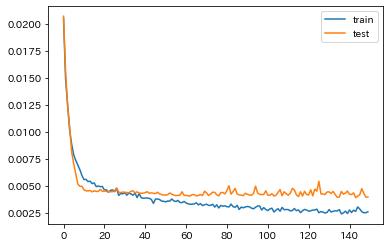

Train RMSE* 1255.717349    
Test_RMSE: 1627.493305  


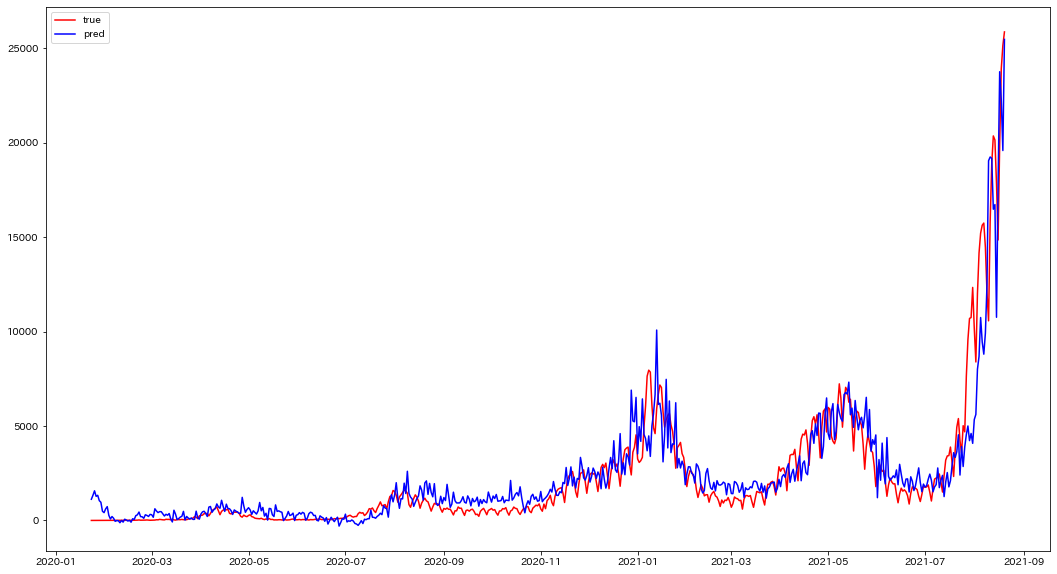

In [7]:
from numpy import loadtxt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import Attention

from tensorflow.keras.optimizers import SGD

from tensorflow import keras

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


#load data ([k1_pop, k2_pop, ... , k10_pop, daily confirmed case yesterday])
dataset = loadtxt('ForTraining.csv', delimiter = ",", skiprows=1)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#print(dataset)
#split data into X and y
# X = dataset[:,12]

X = dataset[:,0:13]
y = dataset[:,13]

#split data into training dataset and testing dataset(0.2)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#the complexity of the network(number of neuron units) ３０
num_units = 30
#learning rate
lr=0.01

#adjust the shape to input the network
X = X.reshape((X.shape[0], 1, X.shape[1]))
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
# X = X.reshape((X.shape[0], 1, 1))
# x_train = x_train.reshape((x_train.shape[0], 1, 1))
# x_test = x_test.reshape((x_test.shape[0], 1, 1))

# #design network
#Single LSTM
# model = Sequential()
# model.add(LSTM(num_units, input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True))
# #model.add(Attention(name='attention_weight'))
# model.add(Dense(num_units,activation='relu'))
# model.add(Dense(1))

# #double LSTM
# model = Sequential([keras.layers.LSTM(num_units, input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True),
#                     #keras.layers.Dropout(0.1),
#                     keras.layers.LSTM(num_units),
#                     #keras.layers.Dropout(0.1),
#                     keras.layers.Dense(1, activation='linear')
# ])

#Bidirectional double LSTM
model = Sequential([keras.layers.Bidirectional(keras.layers.LSTM(num_units, input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True)),
                    keras.layers.Dropout(0.1),
                    keras.layers.Bidirectional(keras.layers.LSTM(num_units)),
                    #keras.layers.Dropout(0.1),
                    keras.layers.Dense(1, activation='linear')
])

# #GRU
# model = Sequential([keras.layers.GRU(num_units, input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True),
#                     keras.layers.Dropout(0.1),
#                     keras.layers.GRU(num_units,return_sequences=False),
#                     keras.layers.Dropout(0.1),
#                     keras.layers.Dense(1, activation='linear')
# ])

#double LSTM
# model = Sequential([keras.layers.LSTM(num_units, input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True,return_state=False),
#                     keras.layers.Dropout(0.1),
#                     keras.layers.BatchNormalization(momentum=0.8),
#                     keras.layers.RepeatVector(2),
#                     keras.layers.LSTM(num_units,return_sequences=True,return_state=False),
#                     keras.layers.Dropout(0.1),
#                     keras.layers.TimeDistributed(keras.layers.Dense(1, activation='linear'))
# ])
# model = Sequential()
# model.add(LSTM(num_units, input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True,return_state=False))
# model.add(Dropout(0.1))
# model.add(BatchNormalization(momentum=0.8))
# model.add(RepeatVector(2))
# model.add(LSTM(num_units,return_sequences=True,return_state=False)),
# model.add(Dropout(0.1))
# model.add(TimeDistributed(keras.layers.Dense(1, activation='linear')))




#use sgd for the optimizer.  SGD(learning_rate=lr, momentum=0.9) adagrad
model.compile(loss='mean_squared_error',optimizer='nadam')


#fit network(run 200times) epochs=200 batch_size=30
history = model.fit(x_train, y_train, epochs=150, batch_size=40, validation_data=(x_test, y_test))
model.summary()
#plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
'''
#calculate rmse of the trainning dataset and validation dataset
trainpred = model.predict(x_train)
train_mse = mean_squared_error(y_train, trainpred)
rmse = np.sqrt(train_mse)
print('Train_RMSE: %f  ' % rmse)
testpred = model.predict(x_test)
test_mse = mean_squared_error(y_test, testpred)
rmse = np.sqrt(train_mse)
print('Test_RMSE: %f  ' % rmse)

#use model to predict with all dataset
pred = model.predict(X)
plt.plot(y, color="red", label="true")
plt.plot(pred,color="blue", label="pred")
plt.legend()
plt.show()

print(pred)
'''

#make a prediction
testpred = model.predict(x_test)
trainpred = model.predict(x_train)
pad_col = np.zeros(dataset.shape[1]-1)
def pad_array(val):
    return np.array([np.insert(pad_col, dataset.shape[1]-1, x) for x in val])

testpred = scaler.inverse_transform(pad_array(testpred))
y_test = scaler.inverse_transform(pad_array(y_test))

trainpred = scaler.inverse_transform(pad_array(trainpred))
y_train = scaler.inverse_transform(pad_array(y_train))

train_mse = mean_squared_error(trainpred[:,13], y_train[:,13])
rmse = np.sqrt(train_mse)

print("Train RMSE* %f    " % rmse)

test_mse = mean_squared_error(testpred[:,13], y_test[:,13])
rmse = np.sqrt(test_mse)

print('Test_RMSE: %f  ' % rmse)

pred = model.predict(X)
pred = scaler.inverse_transform(pad_array(pred))
y = scaler.inverse_transform(pad_array(y))
y=y[:,13]

ds = pd.date_range(startDate,'2021/8/20')
plt.figure(figsize=(18,10))
plt.plot(ds,y, color="red", label="true")
plt.plot(ds, pred[:,13],color="blue", label="pred")
plt.legend()
plt.show()

In [8]:
rmse = np.sqrt(mean_squared_error(y,pred[:,13]))
print(rmse)

1338.9161584934122


Prophet(facebook)


In [ ]:
!pip install fbprophet

In [ ]:
model.train_holiday_names

0         元日
1       成人の日
2     建国記念の日
3      天皇誕生日
4       春分の日
5       昭和の日
6      憲法記念日
7      みどりの日
8      こどもの日
9        海の日
10       山の日
11      敬老の日
12      秋分の日
13    スポーツの日
14      文化の日
15    勤労感謝の日
16      振替休日
dtype: object

# Grid Search

<br> Prophet



In [ ]:
import numpy as np

param_grid = {
    'changepoint_prior_scale':[0.001,0.005,0.01,0.05,0.1,0.5],
    'seasonality_prior_scale':[0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'holidays_prior_scale':[0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]
}
##    'changepoint_prior_scale':[0.001,0.005,0.01,0.05,0.1,0.5],
##    'seasonality_prior_scale':[0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
##    'holidays_prior_scale':[0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]

#Generate all combination of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []

for params in all_params:
  model = Prophet(**params, seasonality_mode='multiplicative').fit(df[df['ds'] < pd.to_datetime('2021-8')])
  df_cv = cross_validation(model, horizon='30 days', parallel="processes")
  df_p = performance_metrics(df_cv, rolling_window=0.1)
  rmses.append(df_p['rmse'].values[0])

#Find the best param



In [ ]:
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
print(rmses)
best_params = all_params[np.argmin(rmses)]
print(best_params)

# Prophetモデル
Google Trends使用

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Making 13 forecasts with cutoffs between 2020-07-06 00:00:00 and 2021-07-01 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

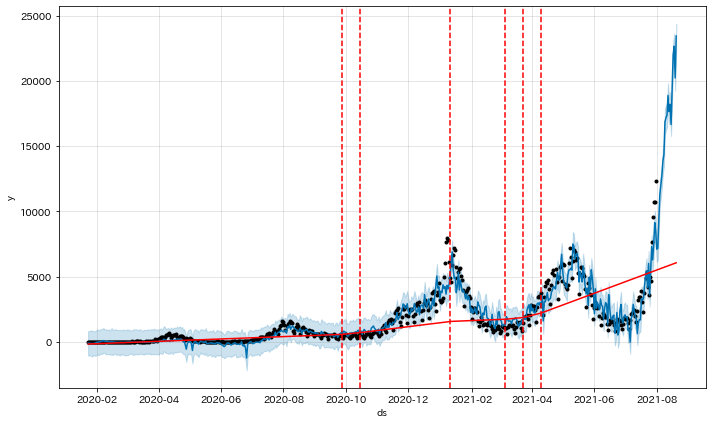

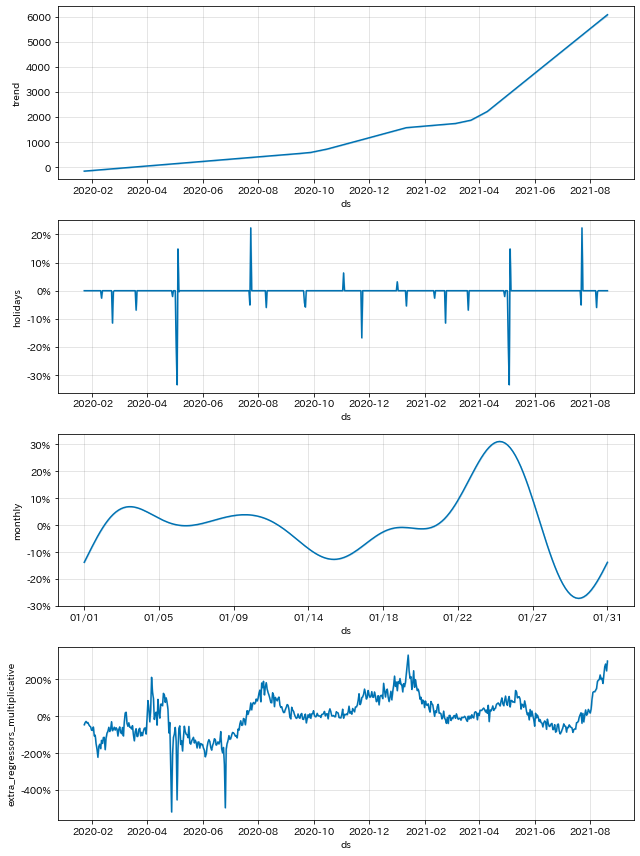

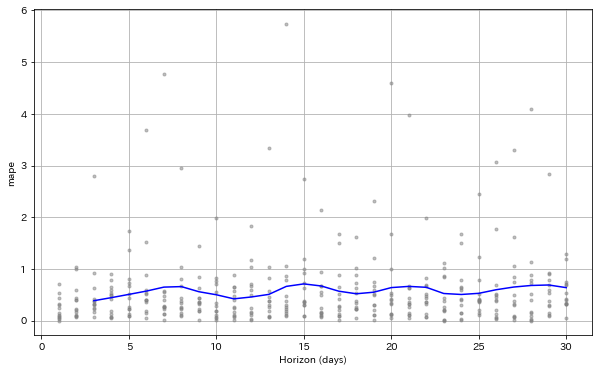

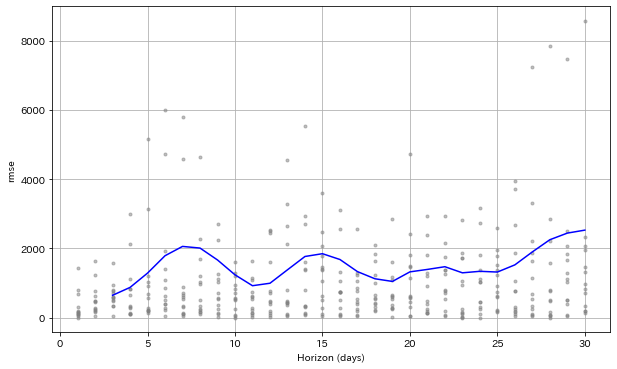

In [9]:
from numpy import loadtxt
from numpy import concatenate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import itertools
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import plotly.express as px
import fbprophet.plot as fp
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import plotly.io as pio
pio.renderers.default = "colab"

dataset = loadtxt('ForTraining.csv', delimiter = ",", skiprows=1)
X = dataset[:,0:13]
y = dataset[:,13]

df = pd.DataFrame(pd.date_range(start=startDate, end="2021-08-20", freq='D', name='ds'))
df['y'] = y
df['k1'] = X[:,0]
df['k2'] = X[:,1]
df['k3'] = X[:,2]
df['k4'] = X[:,3]
df['k5'] = X[:,4]
df['k6'] = X[:,5]
df['k7'] = X[:,6]
df['k8'] = X[:,7]
df['k9'] = X[:,8]
df['k10'] = X[:,9]
df['k11'] = X[:,10]
df['k12'] = X[:,11]
df['k13'] = X[:,12]
#df['lastNum'] = X[:,12]

#{'changepoint_prior_scale': 0.18318795326684206, 'holidays_prior_scale': 0.25778533381311447, 'seasonality_prior_scale': 0.03824075440725081}
#'changepoint_prior_scale': 0.09885173301842563, 'holidays_prior_scale': 0.09955099687996051, 'seasonality_prior_scale': 0.08015260392304538
model = Prophet(seasonality_mode='multiplicative',
                # changepoint_prior_scale=optimized_params_prophet['changepoint_prior_scale'],
                # seasonality_prior_scale = optimized_params_prophet['seasonality_prior_scale'], 
                # holidays_prior_scale= optimized_params_prophet['holidays_prior_scale']
                weekly_seasonality=False,
                 changepoint_prior_scale=0.05,
                 seasonality_prior_scale = 10, 
                 holidays_prior_scale= 10
                )
model.add_country_holidays(country_name='JP')
model.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.1)

##0.05  0.08  0.08


model.add_regressor('k1')
model.add_regressor('k2')
model.add_regressor('k3')
model.add_regressor('k4')
model.add_regressor('k5')
model.add_regressor('k6')
model.add_regressor('k7')
model.add_regressor('k8')
model.add_regressor('k9')
model.add_regressor('k10')
model.add_regressor('k11')
model.add_regressor('k12')
model.add_regressor('k13')
#model.add_regressor('lastNum')

# model.fit(df[df['ds'] < pd.to_datetime('2021-5-26')])
# '''model.fit(df)'''
# future = model.make_future_dataframe(periods=87)
model.fit(df[df['ds'] < pd.to_datetime('2021-8')])
'''model.fit(df)'''
future = model.make_future_dataframe(periods=20)

future['k1'] = df['k1']
future['k2'] = df['k2']
future['k3'] = df['k3']
future['k4'] = df['k4']
future['k5'] = df['k5']
future['k6'] = df['k6']
future['k7'] = df['k7']
future['k8'] = df['k8']
future['k9'] = df['k9']
future['k10'] = df['k10']
future['k11'] = df['k11']
future['k12'] = df['k12']
future['k13'] = df['k13']
#future['lastNum'] = df['lastNum']

forecast = model.predict(future)
a = model.plot(forecast)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
model.plot_components(forecast)
fig = fp.plot_plotly(model, forecast)
fp.add_changepoints_to_plot(a.gca(),model,forecast)
fig.show()


df_cv = cross_validation(model, initial='150 days',period='30 days', horizon='30 days')
df_cv.head()

df_p = performance_metrics(df_cv, rolling_window=0.1)
df_p.head()

plot_cross_validation_metric(df_cv, metric='mape');
plot_cross_validation_metric(df_cv, metric='rmse');


# Prophetモデル
Google Trendsを使用しない

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Making 13 forecasts with cutoffs between 2020-06-26 00:00:00 and 2021-06-21 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

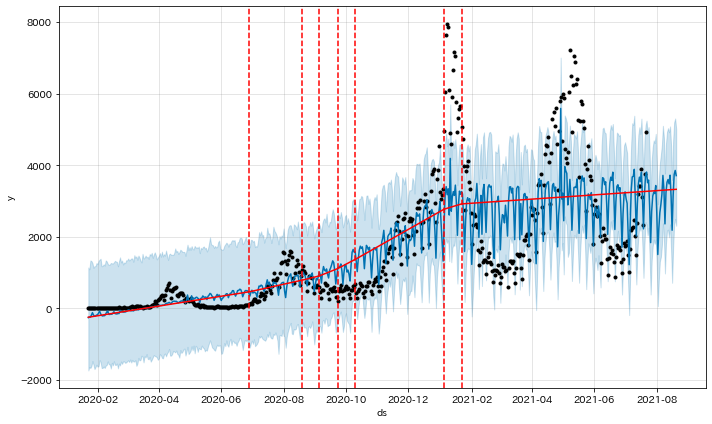

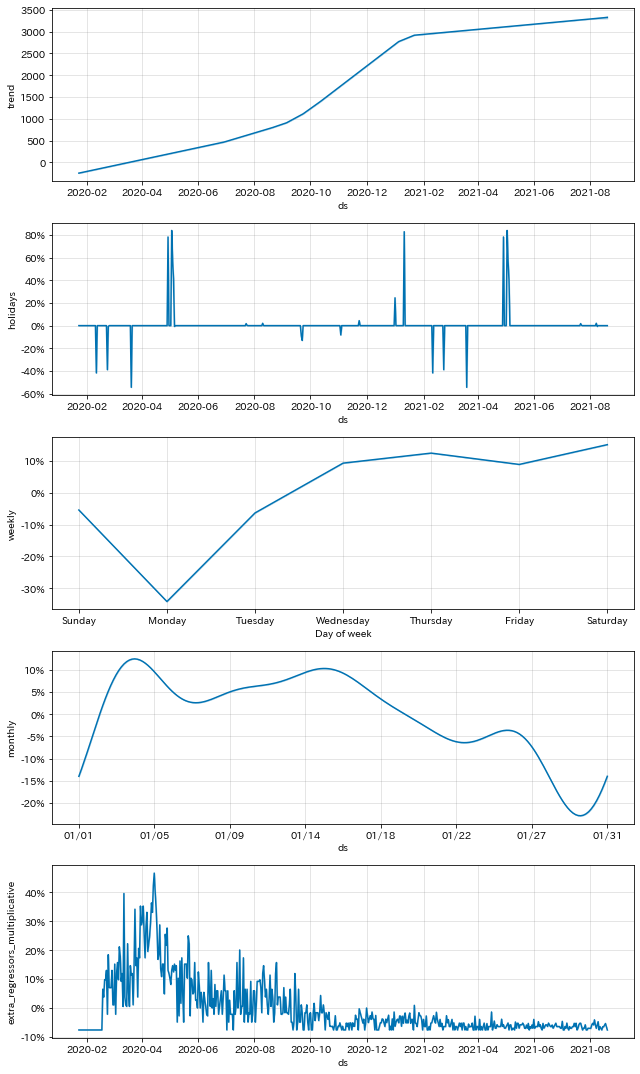

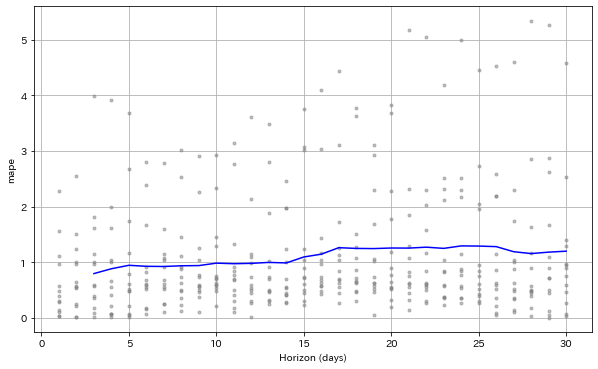

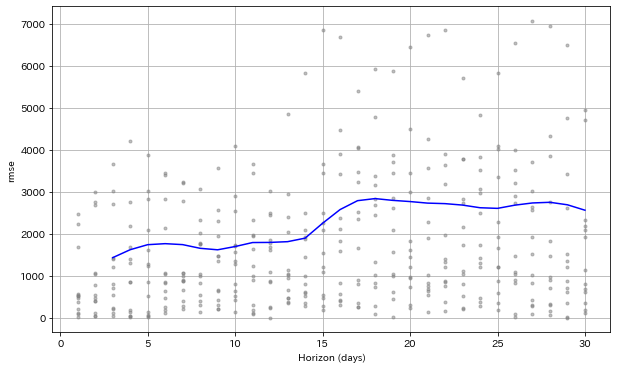

In [ ]:
from numpy import loadtxt
from numpy import concatenate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import itertools
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import plotly.express as px
import fbprophet.plot as fp
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import plotly.io as pio
pio.renderers.default = "colab"

dataset = loadtxt('ForTraining.csv', delimiter = ",", skiprows=1)
X = dataset[:,12]
y = dataset[:,13]

df = pd.DataFrame(pd.date_range(start=startDate, end="2021-08-20", freq='D', name='ds'))
df['y'] = y
# df['k1'] = X[:,0]
# df['k2'] = X[:,1]
# df['k3'] = X[:,2]
# df['k4'] = X[:,3]
# df['k5'] = X[:,4]
# df['k6'] = X[:,5]
# df['k7'] = X[:,6]
# df['k8'] = X[:,7]
# df['k9'] = X[:,8]
# df['k10'] = X[:,9]
# df['k11'] = X[:,10]
# df['k12'] = X[:,11]
# df['k13'] = X[:,12]
df['lastNum'] = X

#{'changepoint_prior_scale': 0.18318795326684206, 'holidays_prior_scale': 0.25778533381311447, 'seasonality_prior_scale': 0.03824075440725081}
#'changepoint_prior_scale': 0.09885173301842563, 'holidays_prior_scale': 0.09955099687996051, 'seasonality_prior_scale': 0.08015260392304538
model = Prophet(seasonality_mode='multiplicative',
                # changepoint_prior_scale=optimized_params_prophet['changepoint_prior_scale'],
                # seasonality_prior_scale = optimized_params_prophet['seasonality_prior_scale'], 
                # holidays_prior_scale= optimized_params_prophet['holidays_prior_scale']
                  changepoint_prior_scale=0.05,
                  seasonality_prior_scale = 10, 
                  holidays_prior_scale= 10,
                )
model.add_country_holidays(country_name='JP')
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

##0.05  0.08  0.08


# model.add_regressor('k1')
# model.add_regressor('k2')
# model.add_regressor('k3')
# model.add_regressor('k4')
# model.add_regressor('k5')
# model.add_regressor('k6')
# model.add_regressor('k7')
# model.add_regressor('k8')
# model.add_regressor('k9')
# model.add_regressor('k10')
# model.add_regressor('k11')
# model.add_regressor('k12')
# model.add_regressor('k13')
model.add_regressor('lastNum')

# model.fit(df[df['ds'] < pd.to_datetime('2021-5-26')])
# '''model.fit(df)'''
# future = model.make_future_dataframe(periods=87)
model.fit(df[df['ds'] < pd.to_datetime('2021-7-22')])
'''model.fit(df)'''
future = model.make_future_dataframe(periods=30)

# future['k1'] = df['k1']
# future['k2'] = df['k2']
# future['k3'] = df['k3']
# future['k4'] = df['k4']
# future['k5'] = df['k5']
# future['k6'] = df['k6']
# future['k7'] = df['k7']
# future['k8'] = df['k8']
# future['k9'] = df['k9']
# future['k10'] = df['k10']
# future['k11'] = df['k11']
# future['k12'] = df['k12']
# future['k13'] = df['k13']
future['lastNum'] = df['lastNum']

forecast = model.predict(future)
a = model.plot(forecast)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
model.plot_components(forecast)
fig = fp.plot_plotly(model, forecast)
fp.add_changepoints_to_plot(a.gca(),model,forecast)
fig.show()


df_cv = cross_validation(model, initial='150 days',period='30 days', horizon='30 days')
df_cv.head()

df_p = performance_metrics(df_cv, rolling_window=0.1)
df_p.head()

plot_cross_validation_metric(df_cv, metric='mape');
plot_cross_validation_metric(df_cv, metric='rmse');


In [10]:
sigma1 = np.sqrt(mean_squared_error(y,forecast['yhat']))
print("prophet: ", sigma1)

prophet:  918.9096631120193


prophet:  918.9096631120193
Xgboost:   692.6046058030796
LSTM:  1338.9161584934122
crmse is below: 
w1:   0.1
c1rmse:   933.9106727879145
c2rmse:   872.273403292848
w1:   0.2
c1rmse:   956.493703024699
c2rmse:   829.3284221588459
w1:   0.30000000000000004
c1rmse:   986.1379956663384
c2rmse:   790.6764064182142
w1:   0.4
c1rmse:   1022.2294128325308
c2rmse:   756.975281596513
w1:   0.5
c1rmse:   1064.112156595936
c2rmse:   728.9120615065365
w1:   0.6000000000000001
c1rmse:   1111.1315289211998
c2rmse:   707.158242945967
w1:   0.7000000000000001
c1rmse:   1162.6645047916736
c2rmse:   692.3089502004838
w1:   0.8
c1rmse:   1218.138378934991
c2rmse:   684.8133425735856
w1:   0.9
c1rmse:   1277.0396834705116
c2rmse:   684.9130348489188
w1:   0.3094756831775492
w2:   0.5447552405272011
w3:   0.14576907629524954
B-G-Combination:   755.2712641709288
[ 0.45198743  0.87375    -0.27659528]
LinearRegressionCombination :   645.9049622262824


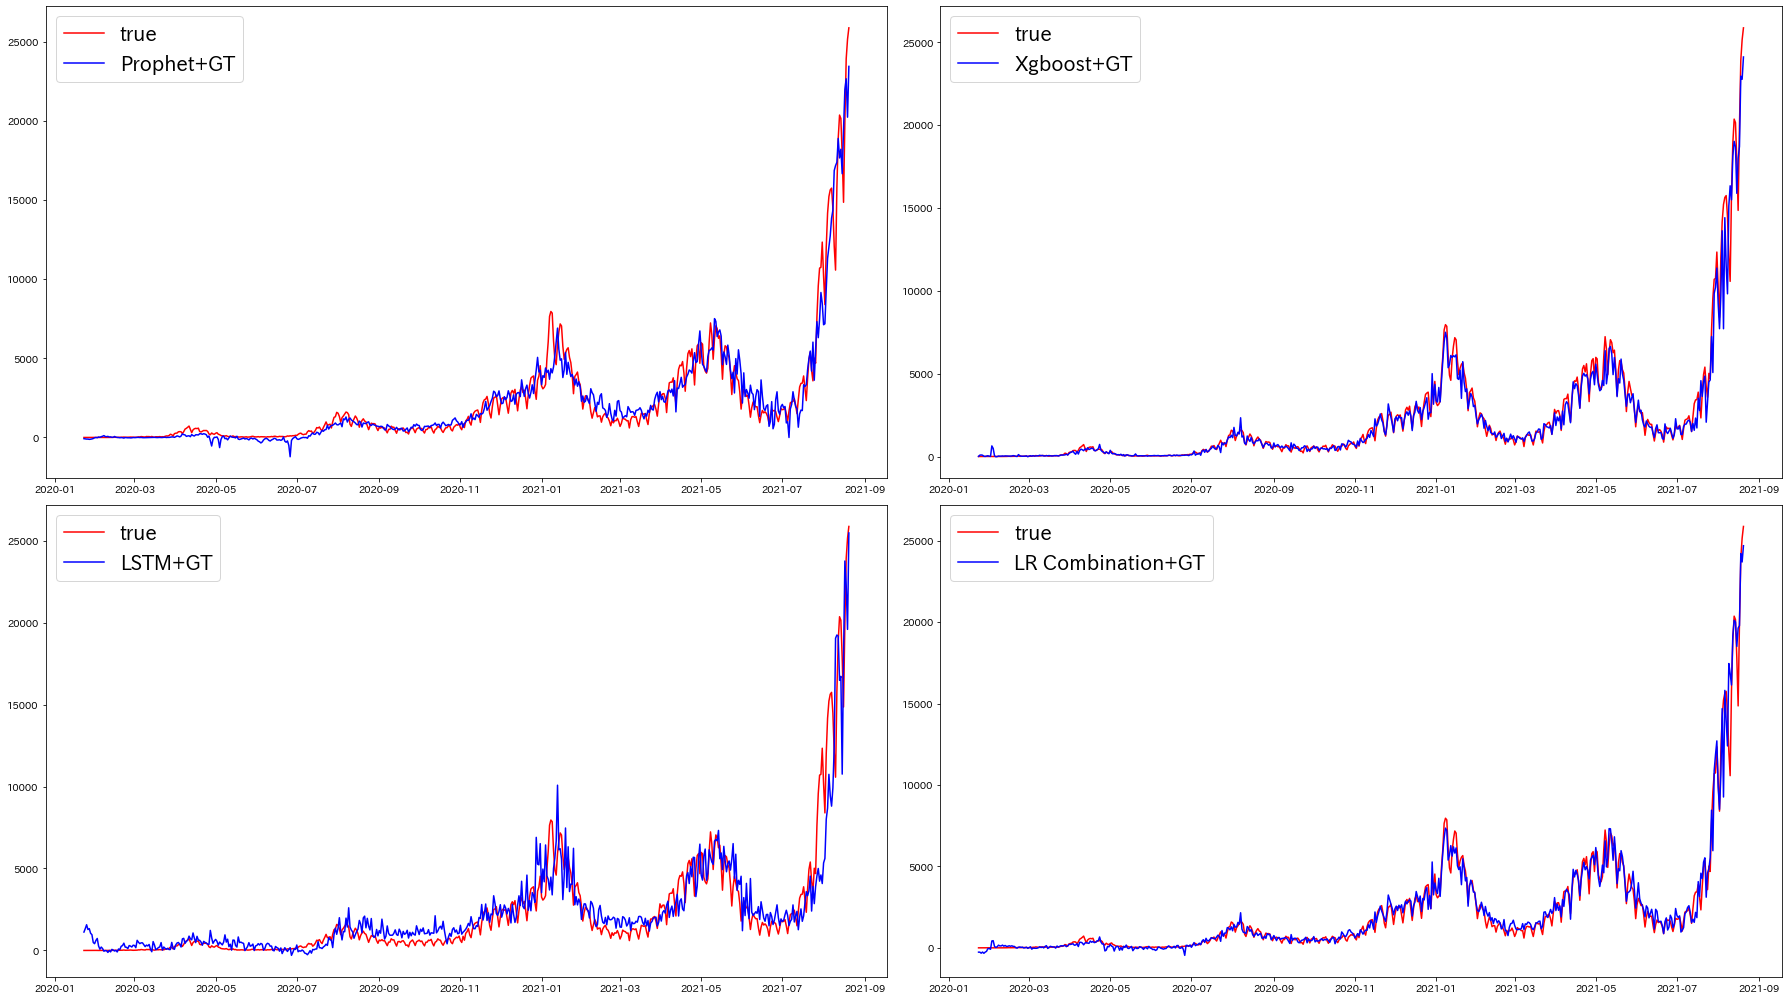

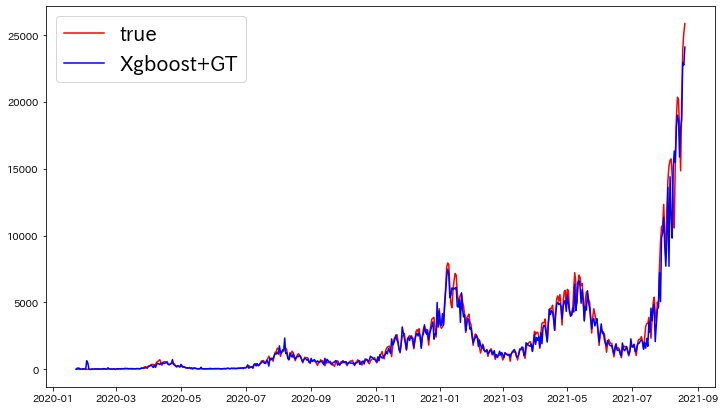

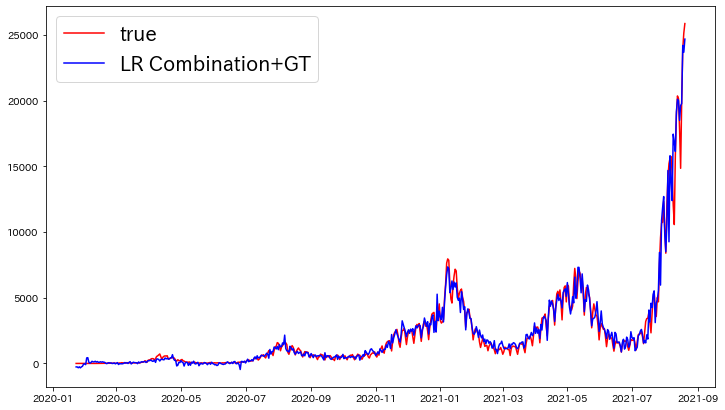

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.set_printoptions(threshold=np.inf)

# a = forecast['yhat']
# a[a<0]=0
# forecast['yhat'] = a

# a = Xg_pred
# a[a<0]=0
# Xgpred=a

# a = pred[:,13]
# a[a<0] = 0
# pred[:,13] = a

sigma1 = np.sqrt(mean_squared_error(y,forecast['yhat']))
print("prophet: ", sigma1)
sigma2 = np.sqrt(mean_squared_error(y,Xg_pred))
print("Xgboost:  ", sigma2);
sigma3 = np.sqrt(mean_squared_error(y,pred[:,13]))
print("LSTM: ",sigma3)

#maxv = 0.5*np.max(Xg_pred)+0.5*np.max(forecast['yhat'])

print("crmse is below: ")
for w1 in range(1,10):
  combine1_y = 0.1*w1*pred[:,13] + (1.0-0.1*w1)*forecast['yhat']
  combine2_y = 0.1*w1*Xg_pred + (1.0-0.1*w1)*forecast['yhat']
  #print(combine2_y)
  c1rmse = np.sqrt(mean_squared_error(y,combine1_y))
  c2rmse = np.sqrt(mean_squared_error(y,combine2_y))
  print("w1:  ", 0.1*w1)
  print("c1rmse:  ",c1rmse)  
  print("c2rmse:  ",c2rmse)

w1 = (1/(sigma1*sigma1))/(1/(sigma1*sigma1) + 1/(sigma2*sigma2) + 1/(sigma3*sigma3))
w2 = (1/(sigma2*sigma2))/(1/(sigma1*sigma1) + 1/(sigma2*sigma2) + 1/(sigma3*sigma3))
w3 = (1/(sigma3*sigma3))/(1/(sigma1*sigma1) + 1/(sigma2*sigma2) + 1/(sigma3*sigma3))
print("w1:  ",w1)
print("w2:  ",w2)
print("w3:  ",w3)

BGCombine = w1*forecast['yhat'] + w2*Xg_pred + w3*pred[:,13]
BGC_rmse = np.sqrt(mean_squared_error(y,BGCombine))
print("B-G-Combination:  ",BGC_rmse)

LRX = np.vstack((forecast['yhat'], Xg_pred ,pred[:,13]))
LRM = LinearRegression()
# LRX_train =LRX.T[:-20,:] 
# LRY_train =y[:-20]
# LRX_test =LRX.T[-20:,:]
# LRY_test = y[-20:]

LRX = LRX.T
LRX_train, LRX_test, LRY_train, LRY_test = train_test_split(LRX, y, test_size=0.2, random_state=20)

LRM.fit(LRX_train, LRY_train)

print(LRM.coef_)

LRY = LRM.predict(LRX);
LRY_rmse = np.sqrt(mean_squared_error(y,LRY))
print("LinearRegressionCombination :  ", LRY_rmse)

ds = pd.date_range(startDate,'2021/8/20')
fig = plt.figure(figsize=(25,14))


ax1 = fig.add_subplot(2,2,1)
ax1.plot(ds,y, color="red", label="true")
ax1.plot(ds, forecast['yhat'], color="blue", label="Prophet+GT")
# ax1.vlines(pd.to_datetime('2021/7/31'),0,26000,color="black")

ax1.legend(fontsize=20)

ax2 = fig.add_subplot(2,2,2)
ax2.plot(ds,y, color="red", label="true")
ax2.plot(ds, Xg_pred, color="blue", label="Xgboost+GT")
ax2.legend(fontsize=20)

ax3 = fig.add_subplot(2,2,3)
ax3.plot(ds,y, color="red", label="true")
ax3.plot(ds, pred[:,13], color="blue", label="LSTM+GT")
ax3.legend(fontsize=20)

ax4 = fig.add_subplot(2,2,4)
ax4.plot(ds,y, color="red", label="true")
ax4.plot(ds, LRY, color='blue', label="LR Combination+GT")
ax4.legend(fontsize=20)
fig.tight_layout()
fig.show()

fig.savefig("prediction.png")

# ds = pd.date_range('2020/1/16','2021/8/20')
# plt.figure(figsize=(25,14))
# plt.plot(ds,y, color="red", label="true")
# plt.plot(ds, forecast['yhat'], color="blue", label="Prophet")
# plt.plot(ds, Xg_pred, color="green", label="Xgboost")
# plt.plot(ds, pred[:,13], color="yellow", label="LSTM")
# plt.plot(ds, LRY, color='black', label="LR Combination")
# plt.legend()
# plt.show()

plt.figure(figsize=(12,7))
plt.plot(ds,y, color="red", label="true")
plt.plot(ds, Xg_pred, color="blue", label="Xgboost+GT")
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(12,7))
plt.plot(ds,y, color="red", label="true")
plt.plot(ds, LRY, color='blue', label="LR Combination+GT")
plt.legend(fontsize=20)
plt.show()

# **ベイズ最適化**
Prophet＋GT


In [ ]:
! pip install Bayesian-optimization

  Created wheel for Bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=f52623fc960b9aedd102666f37ae81e847e056da4be35bf8242ed709dc339405
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built Bayesian-optimization


In [ ]:
from numpy import loadtxt
from numpy import concatenate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import itertools
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import plotly.express as px
from bayes_opt import BayesianOptimization
import fbprophet.plot as fp
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import plotly.io as pio
pio.renderers.default = "colab"

def opt_prophet(changepoint_prior_scale, seasonality_prior_scale, holidays_prior_scale):
  dataset = loadtxt('ForTraining.csv', delimiter = ",", skiprows=1)
  X = dataset[:,0:13]
  y = dataset[:,13]
  df = pd.DataFrame(pd.date_range(start="2020-01-16", end="2021-08-20", freq='D', name='ds'))
  df['y'] = y
  df['k1'] = X[:,0]
  df['k2'] = X[:,1]
  df['k3'] = X[:,2]
  df['k4'] = X[:,3]
  df['k5'] = X[:,4]
  df['k6'] = X[:,5]
  df['k7'] = X[:,6]
  df['k8'] = X[:,7]
  df['k9'] = X[:,8]
  df['k10'] = X[:,9]
  df['k11'] = X[:,10]
  df['k12'] = X[:,11]
  df['k13'] = X[:,12]
  #df['lastNum'] = X[:,12]
  params = {
    'changepoint_prior_scale':changepoint_prior_scale,
    'seasonality_prior_scale':seasonality_prior_scale, 
    'holidays_prior_scale':holidays_prior_scale
  }
  model = Prophet(**params, seasonality_mode='multiplicative')
  model.add_country_holidays(country_name='JP')

  model.add_regressor('k1')
  model.add_regressor('k2')
  model.add_regressor('k3')
  model.add_regressor('k4')
  model.add_regressor('k5')
  model.add_regressor('k6')
  model.add_regressor('k7')
  model.add_regressor('k8')
  model.add_regressor('k9')
  model.add_regressor('k10')
  model.add_regressor('k11')
  model.add_regressor('k12')
  model.add_regressor('k13')

  model.fit(df[df['ds'] < pd.to_datetime('2021-8')])
  '''model.fit(df)'''
  future = model.make_future_dataframe(periods=20)
  future['k1'] = df['k1']
  future['k2'] = df['k2']
  future['k3'] = df['k3']
  future['k4'] = df['k4']
  future['k5'] = df['k5']
  future['k6'] = df['k6']
  future['k7'] = df['k7']
  future['k8'] = df['k8']
  future['k9'] = df['k9']
  future['k10'] = df['k10']
  future['k11'] = df['k11']
  future['k12'] = df['k12']
  future['k13'] = df['k13']
  #future['lastNum'] = df['lastNum']
  forecast = model.predict(future)
  rmse_cv = np.sqrt(mean_squared_error(y,forecast['yhat']))
  return -rmse_cv

pbounds = {'changepoint_prior_scale' : (0.001,0.50), 'seasonality_prior_scale':(0.01,10.0),'holidays_prior_scale':(0.01,10.0)}
prophet_bo = BayesianOptimization(opt_prophet,pbounds=pbounds)
prophet_bo.maximize(init_points=5, n_iter=50, acq='ei')
optimized_params_prophet = prophet_bo.max['params']

print(optimized_params_prophet)

